#### First, importing libraries I'll need for data cleaning and feature engineering.

In [1]:
# NumPy for numerical computing
import numpy as np


# Pandas for DataFrames
import pandas as pd 
pd.set_option('display.max_columns', 100)


# Matplotlib for visualization
from matplotlib import pyplot as plt 
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns 
sns.set_style('darkgrid')


# (Optional) Suppress FutureWarning
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Next, reading in the dataset.
* The file name is <code style="color:crimson">'employee_data.csv'</code>

In [2]:
df = pd.read_csv('employee_data.csv')
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


## <span style="color:RoyalBlue"> 2.1 - Drop Unwanted Observations</span>

#### A.) First, <span style="color:royalblue">dropping duplicates</span> from the dataset.

In [3]:
df.drop_duplicates(inplace=True)
print(df.shape)

(14221, 10)


#### B.) Displaying all of the unique classes of the <code style="color:steelblue">'department'</code> feature.

In [4]:
print(df.department.unique())

['engineering' 'support' 'sales' 'IT' 'product' 'marketing' 'temp'
 'procurement' 'finance' nan 'management' 'information_technology' 'admin']


#### C.) Dropping all observations that belong to the <span style="color:crimson">'temp'</span> department.

In [5]:
df = df[df.department != 'temp']
print(df.shape)

(14068, 10)


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
(14068, 10)
</pre>

## <span style="color:RoyalBlue"> 2.2 - Fixing Structural Errors</span>

#### A.) Printing the unique values of <code style="color:steelblue">'filed_complaint'</code> and <code style="color:steelblue">'recently_promoted'</code>.

In [6]:
# Print unique values of 'filed_complaint'
print( df.filed_complaint.unique() )

# Print unique values of 'recently_promoted'
print( df.recently_promoted.unique() )

[nan  1.]
[nan  1.]


#### B.) Filling in missing <code style="color:steelblue">'filed_complaint'</code> and <code style="color:steelblue">'recently_promoted'</code> values with <code style="color:crimson">0</code>.

In [7]:
df.filed_complaint.fillna(0, inplace=True)
df.recently_promoted.fillna(0, inplace=True)

#### C.) Printing the unique values of <code style="color:steelblue">'filed_complaint'</code> and <code style="color:steelblue">'recently_promoted'</code> again, just as a quick sanity check.

In [8]:
print(df.filed_complaint.unique())
print(df.recently_promoted.unique())

[0. 1.]
[0. 1.]


#### D.) Replacing any instances of <code style="color:crimson">'information_technology'</code> with <code style="color:crimson">'IT'</code> instead.


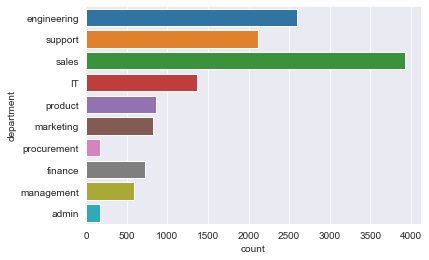

In [9]:
df.department.replace('information_technology', 'IT', inplace=True)
sns.countplot(y='department', data=df)
plt.show()

## <span style="color:RoyalBlue"> 2.3 - Handle Missing Data</span>

#### A.) First, pinpointing the missing data. Then, displaying the <span style="color:royalblue">number of missing values</span> for each feature (both categorical and numeric).

In [10]:
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

#### B.) Label missing values in <code style="color:steelblue">'department'</code> as <code style="color:crimson">'Missing'</code>.

In [11]:
df['department'].fillna('Missing', inplace=True)

Next, **flagging and filling** missing numerical features.

#### C.) First, flagging <code style="color:steelblue">'last_evaluation'</code> with an indicator variable of missingness.
* <code style="color:crimson">0</code> if not missing.
* <code style="color:crimson">1</code> if missing. 

I name the new indicator variable <code style="color:steelblue">'last_evaluation_missing'</code>.
* Using the <code style="color:steelblue">.isnull()</code> function.

In [14]:
df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)

#### D.) Filling in the original missing value with <code style="color:crimson">0</code> just so my algorithms can run properly.

In [15]:
df.last_evaluation.fillna(0, inplace=True)

#### E.) Displaying the number of missing values for each feature (both categorical and numeric) again, just to confirm.

In [16]:
df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64

## <span style="color:RoyalBlue"> 2.4 - Engineer Features</span>


#### A.) Reproducing the scatterplot of <code style="color:steelblue">'satisfaction'</code> and <code style="color:steelblue">'last_evaluation'</code> for employees who have <code style="color:crimson">'Left'</code>

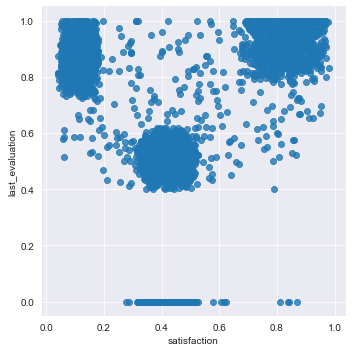

In [17]:
sns.lmplot(x='satisfaction', 
          y='last_evaluation', 
          data=df[df.status == 'Left'], 
          fit_reg=False)
plt.show()

Based on the top half, it looks like there are 3 clusters of people who left.
1. First, we have people with high <code style="color:steelblue">'last_evaluation'</code> but low <code style="color:steelblue">'satisfaction'</code>. Maybe these people were overqualified, frustrated, or **unhappy** in some other way.
2. Next, we have people with low <code style="color:steelblue">'last_evaluation'</code> and medium <code style="color:steelblue">'satisfaction'</code>. These were probably **underperformers** or poor cultural fits.
3. Finally, we have people with high <code style="color:steelblue">'last_evaluation'</code> and high <code style="color:steelblue">'satisfaction'</code>. Perhaps these were **overachievers** who found better offers elsewhere.

These roughly translate to 3 **indicator features** we can engineer:

* <code style="color:steelblue">'underperformer'</code> - last_evaluation < 0.6 and last_evaluation_missing == 0
* <code style="color:steelblue">'unhappy'</code> - satisfaction_level < 0.2
* <code style="color:steelblue">'overachiever'</code> - last_evaluation > 0.8 and satisfaction > 0.7


#### B.) Creating those 3 indicator features.
* Using boolean masks.

In [18]:
df['underperformer'] = ((df.last_evaluation < 0.6) & 
                        (df.last_evaluation_missing == 0)).astype(int)
df['unhappy'] = (df.satisfaction < 0.2).astype(int)
df['overachiever'] = ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)

#### C.) Finally, checking that the features have been created correctly. Displaying the proportion of employees from the dataset that fall into each of those 3 categories.

In [19]:
df[['underperformer', 'unhappy', 'overachiever']].mean()

underperformer    0.285257
unhappy           0.092195
overachiever      0.177069
dtype: float64

## <span style="color:RoyalBlue"> 2.5 - Save the ABT</span>

#### A.) Converting <code style="color:steelblue">'status'</code> into an indicator variable.
* <code style="color:crimson">'Left'</code> should be <code style="color:crimson">1</code>
* <code style="color:crimson">'Employed'</code> should be <code style="color:crimson">0</code>

In [20]:
df['status'] = pd.get_dummies(df.status).Left

#### B.) To confirm I did that correctly, displaying the proportion of people in our dataset who left.

In [21]:
df.status.mean()

0.23933750355416547

Next, creating dummy variables for the other categorical features.

#### C.) Overwriting my dataframe with a version that has <span style="color:royalblue">dummy variables</span> for the categorical features.

In [22]:
df = pd.get_dummies(df, columns=['department', 'salary'])
df.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,unhappy,overachiever,department_IT,department_Missing,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,140,0.0,0.589097,4,0.0,0.660020,0,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,121,1.0,0.625399,3,0.0,0.835571,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7,150,0.0,0.644586,4,0.0,0.796683,0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8,215,1.0,0.524114,3,0.0,0.715005,0,7.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9,269,0.0,0.909364,5,0.0,0.994037,0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


#### D.) Saving this dataframe as your <span style="color:royalblue">analytical base table</span> to use in later modules.


In [23]:
df.to_csv('analytical_base_table.csv', index=None)